In [1]:
import pandas as pd

In [6]:
data = pd.read_csv('animals.csv',header='infer')
names = data['Name']
Y = data['Class']
X = data.drop(['Name','Class'],axis=1)

In [7]:
data

,Name,warmBlooded,coldBlooded,GiveBirth,LayEggs,CanSwim,CanFly,HasLegs,HasScales,Class
0,human,1,0,1,0,0,0,1,0,mammal
1,python,0,1,0,1,0,0,0,1,reptile
2,salmon,0,1,0,1,1,0,0,1,fish
3,whale,1,0,1,0,1,0,0,0,mammal
4,frog,0,1,0,1,1,0,1,0,amphibian
5,komodo dragon,0,1,0,1,0,0,1,1,reptile
6,bat,1,0,1,0,0,1,1,0,mammal
7,pigeon,1,0,0,1,0,1,1,0,bird
8,cat,1,0,1,0,0,0,1,0,mammal
9,leopard shark,0,1,1,0,1,0,0,1,fish


In [8]:
from sklearn import cluster

In [10]:
k_means = cluster.KMeans(n_clusters=5)
k_means.fit(X)
values = k_means.cluster_centers_
pd.DataFrame(values)

,0,1,2,3,4,5,6,7
0,0.0,1.0,0.00,1.00,0.666667,0.0,1.0,1.0
1,1.0,0.0,1.00,0.00,0.200000,0.2,0.8,0.0
2,1.0,0.0,0.00,1.00,0.500000,0.5,1.0,0.0
3,0.0,1.0,0.25,0.75,0.750000,0.0,0.0,1.0
4,0.0,1.0,0.00,1.00,1.000000,0.0,1.0,0.0


In [11]:
labels = k_means.labels_
pd.DataFrame(labels)

,0
0,1
1,3
2,3
3,1
4,4
5,0
6,1
7,2
8,1
9,3


In [12]:
from pandas import Series
clusters = pd.DataFrame(names)
clusters['Cluster'] = labels
clusters

,Name,Cluster
0,human,1
1,python,3
2,salmon,3
3,whale,1
4,frog,4
5,komodo dragon,0
6,bat,1
7,pigeon,2
8,cat,1
9,leopard shark,3


In [14]:
from sklearn import metrics
metrics.adjusted_rand_score(Y,labels)

0.82683982683982682

In [15]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
%matplotlib inline

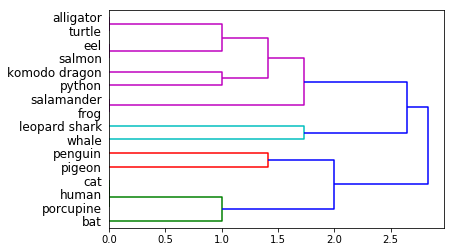

In [16]:
Z = hierarchy.linkage(X.as_matrix(),'complete')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

In [17]:
threshold = 1.1
label = hierarchy.fcluster(Z,threshold)
label

array([1, 4, 5, 2, 3, 4, 1, 1, 1, 2, 6, 1, 1, 5, 3, 6], dtype=int32)

In [18]:
metrics.adjusted_rand_score(Y,label)

0.44117647058823528

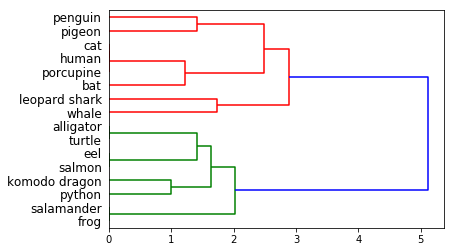

In [24]:
Z = hierarchy.linkage(X.as_matrix(),'ward')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

In [27]:
threshold = 1.15
label = hierarchy.fcluster(Z,threshold)
label

array([5, 2, 3, 5, 1, 2, 5, 5, 5, 5, 4, 5, 5, 3, 1, 4], dtype=int32)

In [28]:
metrics.adjusted_rand_score(Y,label)

0.44976076555023931